In [2]:
%reload_ext tensorboard
%tensorboard --logdir=C:/Users/vohi0/Desktop/Semantic/results/

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np


mnist_log = pd.read_csv('./record/MNIST_LogisticRegression_lightning_logs_version_7.csv')
mnist_log['Relative time'] = mnist_log['Wall time'] - mnist_log.iloc[0]['Wall time']
mnist_res = pd.read_csv('./record/MNIST_ResNet_lightning_logs_version_0.csv')
mnist_res['Relative time'] = mnist_res['Wall time'] - mnist_res.iloc[0]['Wall time']

mnist_logtest = pd.read_csv('./record/MNIST_LogisticRegression_test.csv')
mnist_logtest['Relative time'] = mnist_logtest['Wall time'] - mnist_logtest.iloc[0]['Wall time']
mnist_restest = pd.read_csv('./record/MNIST_ResNet_test.csv')
mnist_restest['Relative time'] = mnist_restest['Wall time'] - mnist_restest.iloc[0]['Wall time']


mnist_log['Episode'] = mnist_log['Step'] // 782
mnist_res['Episode'] = mnist_log['Step'] // 937

mnist_logtest['Episode'] = mnist_logtest['Step'] // 782
mnist_restest['Episode'] = mnist_restest['Step'] // 937

mnist_log = mnist_log.groupby(['Episode'], as_index=False).mean()
mnist_logtest = mnist_logtest.groupby(['Episode'], as_index=False).mean()
mnist_res = mnist_res.groupby(['Episode'], as_index=False).mean()
mnist_restest = mnist_restest.groupby(['Episode'], as_index=False).mean()

mnist_log = mnist_log.loc[mnist_log['Episode'].isin(mnist_logtest['Episode'])]
mnist_res = mnist_res.loc[mnist_res['Episode'].isin(mnist_logtest['Episode'])]
mnist_restest = mnist_restest.loc[mnist_restest['Episode'].isin(mnist_logtest['Episode'])]





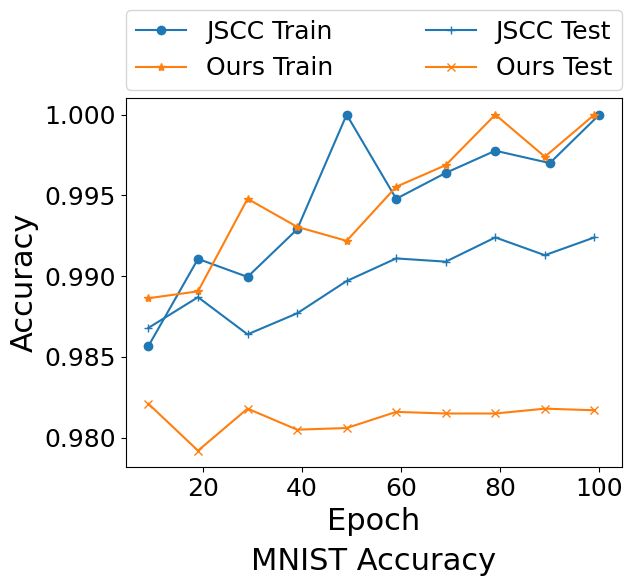

In [4]:
plt.plot(list(mnist_res['Episode']) + [90, 100], list(mnist_res['Value']) + [0.997, 1.0], label='JSCC Train', marker='o')
plt.plot(mnist_log['Episode'], mnist_log['Value'], label='Ours Train', marker = '*')
plt.plot(mnist_restest['Episode'], mnist_restest['Value'], label='JSCC Test', marker='+', color='tab:blue')
plt.plot(mnist_logtest['Episode'], mnist_logtest['Value'], label='Ours Test', marker = 'x', color='tab:orange')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2, fontsize=18)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('Accuracy', fontsize=22)
plt.title('MNIST Accuracy', fontsize=22, y=-0.3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('../figures/classification/MNIST_acc.pdf', bbox_inches='tight')
plt.show()

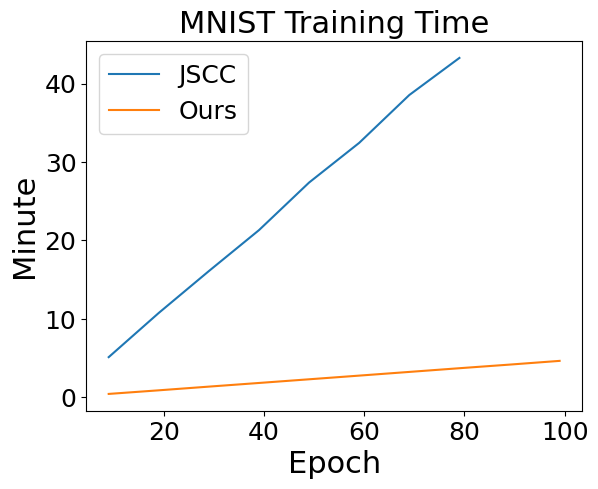

In [5]:
plt.plot(mnist_res['Episode'], mnist_res['Relative time']/60, label='JSCC')
plt.plot(mnist_log['Episode'], mnist_log['Relative time']/60, label='Ours')
plt.legend(fontsize=18)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('Minute', fontsize=22)
plt.title('MNIST Training Time', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../figures/classification/MNIST_Train_time.pdf', bbox_inches='tight')

plt.show()

In [6]:
stl_log = pd.read_csv('./record/STL10_LogisticRegression_lightning_logs_version_5.csv')
stl_log['Relative time'] = stl_log['Wall time'] - stl_log.iloc[0]['Wall time']
stl_res = pd.read_csv('./record/STL10_ResNet_lightning_logs_version_4.csv')
stl_res['Relative time'] = stl_res['Wall time'] - stl_res.iloc[0]['Wall time']

stl_log['Episode'] = stl_log['Step'] // 79
stl_res['Episode'] = stl_res['Step'] // 78

stl_logtest = pd.read_csv('./record/STL10_LogisticRegression_test.csv')
stl_logtest['Relative time'] = stl_logtest['Wall time'] - stl_logtest.iloc[0]['Wall time']
stl_restest = pd.read_csv('./record/STL10_ResNet_test.csv')
stl_restest['Relative time'] = stl_restest['Wall time'] - stl_restest.iloc[0]['Wall time']

stl_logtest['Episode'] = stl_logtest['Step'] // 79
stl_restest['Episode'] = stl_restest['Step'] // 78

stl_log = stl_log.groupby(['Episode'], as_index=False).mean()
stl_logtest = stl_logtest.groupby(['Episode'], as_index=False).mean()
stl_res = stl_res.groupby(['Episode'], as_index=False).mean()
stl_restest = stl_restest.groupby(['Episode'], as_index=False).mean()

stl_log = stl_log.loc[stl_log['Episode'].isin(stl_logtest['Episode'])]
stl_res = stl_res.loc[stl_res['Episode'].isin(stl_logtest['Episode'])]
stl_restest = stl_restest.loc[stl_restest['Episode'].isin(stl_logtest['Episode'])]


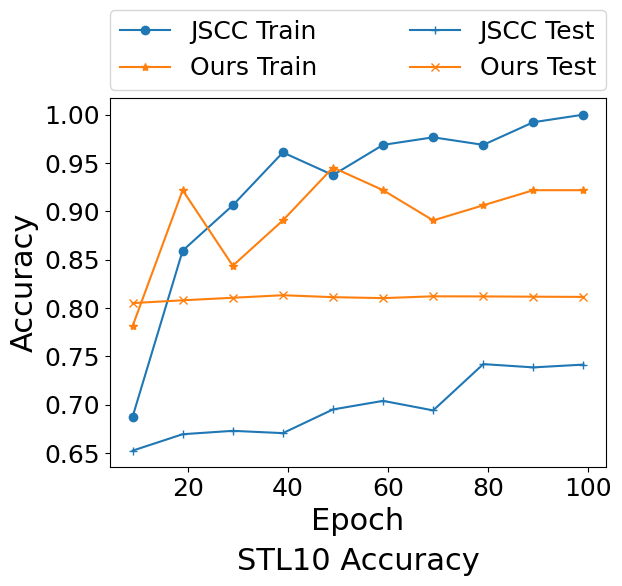

In [7]:
plt.plot(stl_res['Episode'], stl_res['Value'], label='JSCC Train', marker='o')
plt.plot(stl_log['Episode'], stl_log['Value'], label='Ours Train', marker='*')
plt.plot(stl_restest['Episode'], stl_restest['Value'], label='JSCC Test', marker='+',color='tab:blue')
plt.plot(stl_logtest['Episode'], stl_logtest['Value'], label='Ours Test', marker='x',color='tab:orange')

plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2, fontsize=18)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('Accuracy', fontsize=22)
plt.title('STL10 Accuracy', fontsize=22, y=-0.3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('../figures/classification/STL10_acc.pdf', bbox_inches='tight')

plt.show()

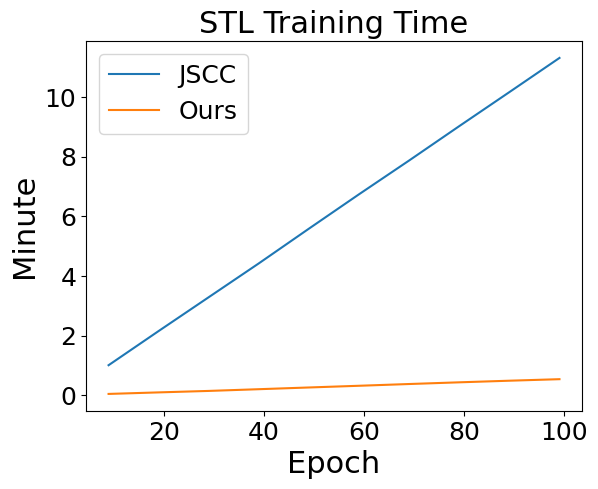

In [8]:
plt.plot(stl_res['Episode'], stl_res['Relative time']/60, label='JSCC')
plt.plot(stl_log['Episode'], stl_log['Relative time']/60, label='Ours')
plt.legend(fontsize=18)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('Minute', fontsize=22)
plt.title('STL Training Time', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../figures/classification/STL10_Train_time.pdf', bbox_inches='tight')

plt.show()

In [9]:
stl_traditional = pd.read_csv('./record/STL10_traditional.csv')
stl_ours = pd.read_csv('./record/STL10_SIMCLR.csv')
print(stl_ours.head())

   Unnamed: 0  Epoch      SSIM        Time
0           0      0  0.997989  101.733408
1           1      1  0.998615  203.862731
2           2      2  0.998775  305.996271
3           3      3  0.998727  408.287182
4           4      4  0.998756  510.709687


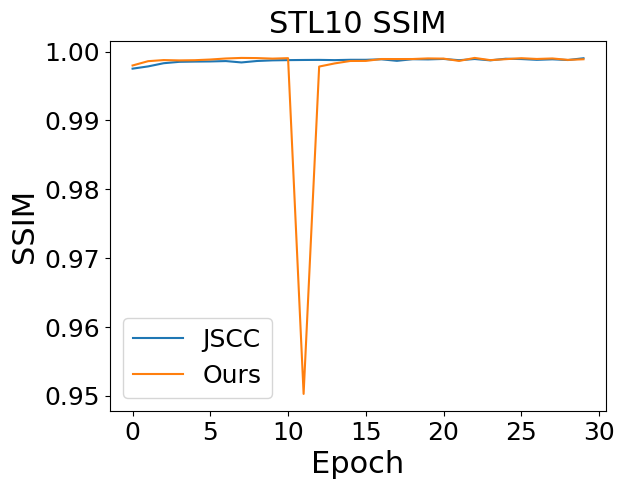

In [10]:
plt.plot(stl_traditional['Epoch'], stl_traditional['SSIM'], label='JSCC')
plt.plot(stl_ours['Epoch'], stl_ours['SSIM'], label='Ours')
plt.legend(fontsize=18)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('SSIM', fontsize=22)
plt.title('STL10 SSIM', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../figures/reconstruction/STL10_SSIM.pdf', bbox_inches='tight')

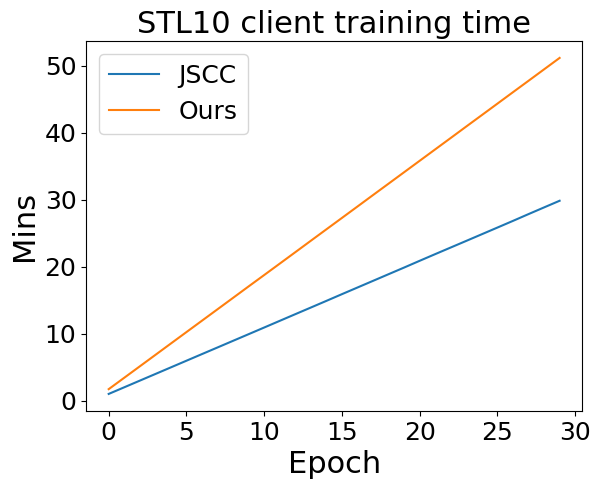

In [11]:
plt.plot(stl_traditional['Epoch'], stl_traditional['Time']/60, label='JSCC')
plt.plot(stl_ours['Epoch'], stl_ours['Time']/60, label='Ours')
plt.legend(fontsize=18)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('Mins', fontsize=22)
plt.title('STL10 client training time', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../figures/reconstruction/STL10_time.pdf', bbox_inches='tight')

In [12]:
mnist_traditional = pd.read_csv('./record/MNIST_traditional.csv')
mnist_ours = pd.read_csv('./record/MNIST_SIMCLR.csv')

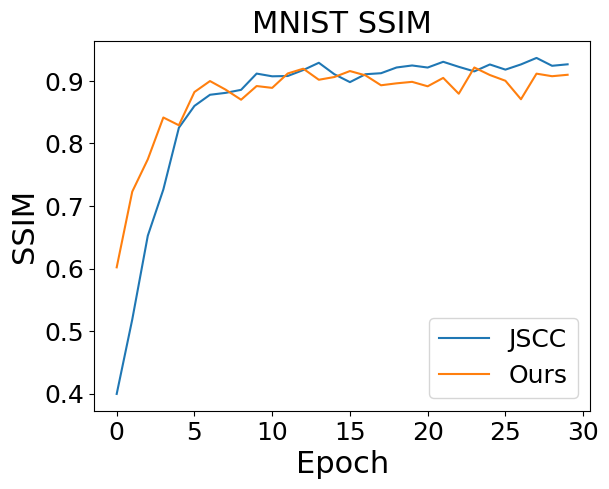

In [13]:
plt.plot(mnist_traditional['Epoch'], mnist_traditional['SSIM'], label='JSCC')
plt.plot(mnist_ours['Epoch'], mnist_ours['SSIM'], label='Ours')
plt.legend(fontsize=18)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('SSIM', fontsize=22)
plt.title('MNIST SSIM', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../figures/reconstruction/MNIST_SSIM.pdf', bbox_inches='tight')

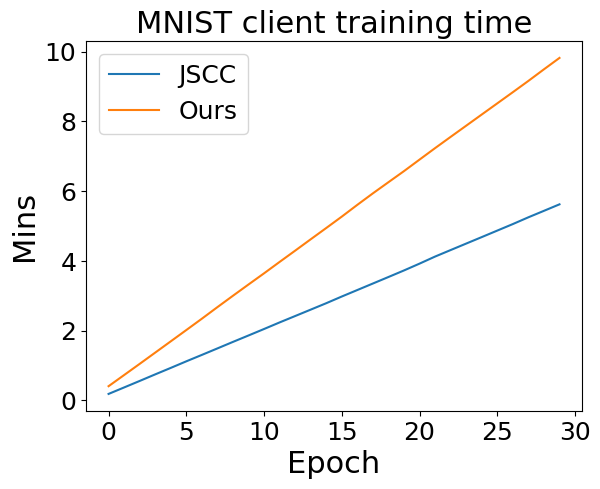

In [14]:
plt.plot(mnist_traditional['Epoch'], mnist_traditional['Time']/60, label='JSCC')
plt.plot(mnist_ours['Epoch'], mnist_ours['Time']/60, label='Ours')
plt.legend(fontsize=18)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('Mins', fontsize=22)
plt.title('MNIST client training time', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../figures/reconstruction/MNIST_time.pdf', bbox_inches='tight')

In [15]:
mnist_start = pd.read_csv('./record/MNISTstart.csv')
mnist_start['Relative time'] = (mnist_start['Wall time'] - mnist_start.iloc[0]['Wall time'])/60

mnist_start = mnist_start.groupby(['Value'], as_index=False).mean()
episodes = list(range(0, len(mnist_start)))
mnist_start['Epoch'] = episodes
print(len(mnist_start))

stl_start = pd.read_csv('./record/STL10start.csv')
stl_start['Relative time'] = (stl_start['Wall time'] - stl_start.iloc[0]['Wall time'])/60

stl_start = stl_start.groupby(['Value'], as_index=False).mean()
episodes = list(range(0, len(stl_start)))
stl_start['Epoch'] = episodes
print(len(stl_start))

# stl_start = stl_start.head(len(mnist_start))
# stl_start['Relative time'] = (stl_start['Wall time'] - stl_start.iloc[0]['Wall time'])/60
# stl_start['Epoch'] = episodes
# stl_start.head()

200
446


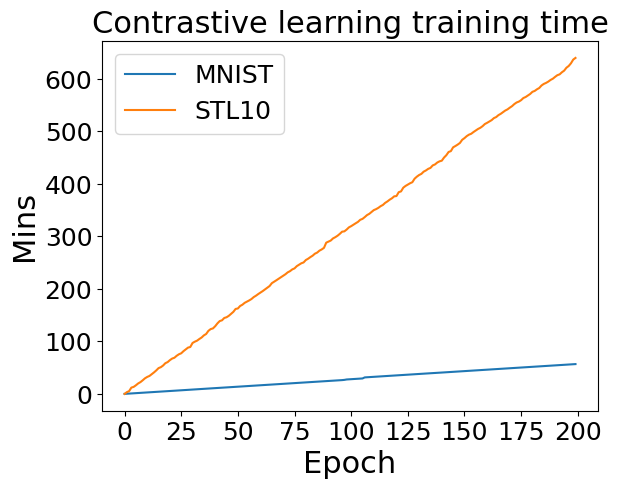

In [16]:
plt.plot(mnist_start['Epoch'], mnist_start['Relative time'], label='MNIST')
plt.plot(stl_start['Epoch'][:200], stl_start['Relative time'][:200], label='STL10')
plt.legend(fontsize=18)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('Mins', fontsize=22)
plt.title('Contrastive learning training time', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../figures/simclrTrainTime.pdf', bbox_inches='tight')

In [17]:
print(mnist_traditional['Time'].max()/60)
print(mnist_ours['Time'].max()/60)

5.622585948308309
9.819633118311565


In [18]:
print(stl_traditional['Time'].max()/60)
print(stl_ours['Time'].max()/60)

29.824434288342793
51.150168200333916


In [19]:
print(stl_log['Relative time'].max()/60)
print(stl_res['Relative time'].max()/60)

0.5359080374240875
11.311885851621629


In [20]:
print(mnist_log['Relative time'].max()/60)
print(mnist_res['Relative time'].max()/60)

4.644767695206863
43.28323307661783


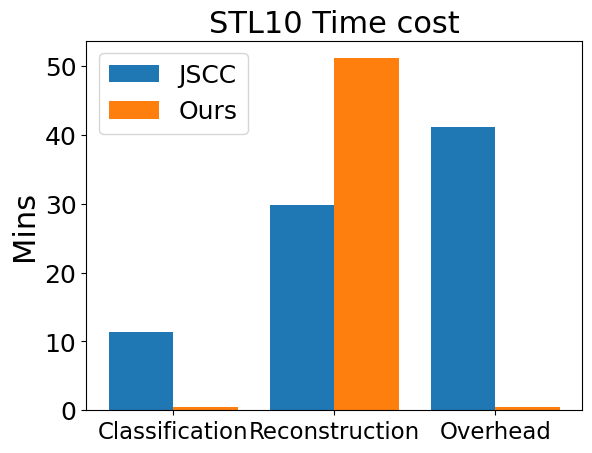

In [21]:
X = ['Classification','Reconstruction','Overhead']
Ygirls = [stl_res['Relative time'].max()/60,stl_traditional['Time'].max()/60,stl_res['Relative time'].max()/60+stl_traditional['Time'].max()/60]
Zboys = [stl_log['Relative time'].max()/60,stl_ours['Time'].max()/60,0.5]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'JSCC')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Ours')
  
plt.xticks(X_axis, X)
plt.ylabel("Mins", fontsize=22)
plt.title("STL10 Time cost", fontsize=22)
plt.xticks(fontsize=16.5)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.savefig('../figures/STLtime.pdf', bbox_inches='tight')
plt.show()

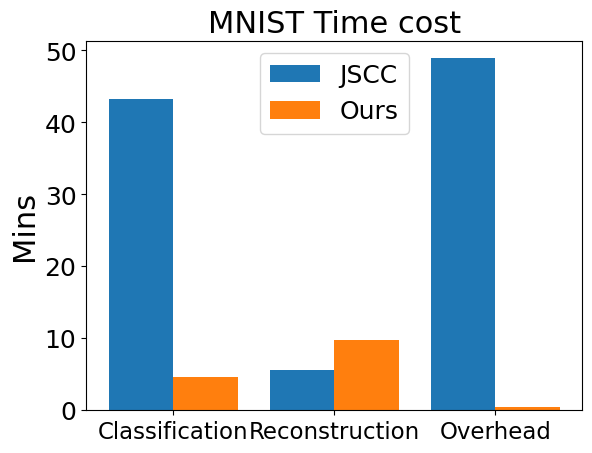

In [22]:
X = ['Classification','Reconstruction','Overhead']
Ygirls = [mnist_res['Relative time'].max()/60,mnist_traditional['Time'].max()/60,mnist_res['Relative time'].max()/60+mnist_traditional['Time'].max()/60]
Zboys = [mnist_log['Relative time'].max()/60,mnist_ours['Time'].max()/60,0.5]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'JSCC')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Ours')
  
plt.xticks(X_axis, X)
plt.ylabel("Mins", fontsize=22)
plt.title("MNIST Time cost", fontsize=22)
plt.xticks(fontsize=16.5)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.savefig('../figures/MNISTtime.pdf', bbox_inches='tight')
plt.show()